# <font color='blue'>Problema de Machine Learning de Classificação: Diagnóstico de Diabetes</font>

# 1 - Definindo o problema de negócio

### Você foi contratado por um hospital para desenvolver um modelo de machine learning que possa ajudar os médicos no diagnóstico precoce de diabetes em pacientes. O hospital deseja melhorar a eficiência dos diagnósticos, permitindo uma intervenção mais rápida e precisa para os pacientes em risco de desenvolver diabetes.

# 2 - Decisões

### O problema de negócio já informa que é requerido um modelo de Machine Learning. No dataset, temos a coluna “Outcome” que é a variável que queremos prever. Desta forma, iremos utilizar aprendizagem supervisionada.

# 3 - Versão python e import dos pacotes utilizados

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
#!pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Danilo Temerloglou de Abreu" --iversions

Author: Danilo Temerloglou de Abreu

sklearn   : 1.2.1
seaborn   : 0.12.2
matplotlib: 3.7.1
numpy     : 1.23.5
pandas    : 1.3.4



# 4 - Dicionário de dados

In [5]:
#Pregnancies - Número de vezes grávida
#Glucose - Concentração de glicose no plasma
#BloodPressure - Pressão sanguínea diastólica
#SkinThickness - Espessura da dobra da pele do tríceps
#Insulin - Nível de insulina sérica
#BMI - Índice de massa corporal (IMC)
#DiabetesPedigreeFunction - Função de pedigree de diabetes
#Age - Idade
#Outcome - Variável de classe (0 ou 1, indicando a presença ou ausência de diabetes)

# 5 - Carregando o Conjunto de dados

In [6]:
# Carrega o dataset
df = pd.read_csv('diabetes.csv')

# 6 - EDA Análise Exploratória de Dados

In [7]:
# Shape
df.shape

(768, 9)

In [8]:
#nomes das colunas
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# Amostra
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
415,3,173,84,33,474,35.7,0.258,22,1
9,8,125,96,0,0,0.0,0.232,54,1
437,5,147,75,0,0,29.9,0.434,28,0
223,7,142,60,33,190,28.8,0.687,61,0
399,3,193,70,31,0,34.9,0.241,25,1


### Exploração das variáveis numéricas

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


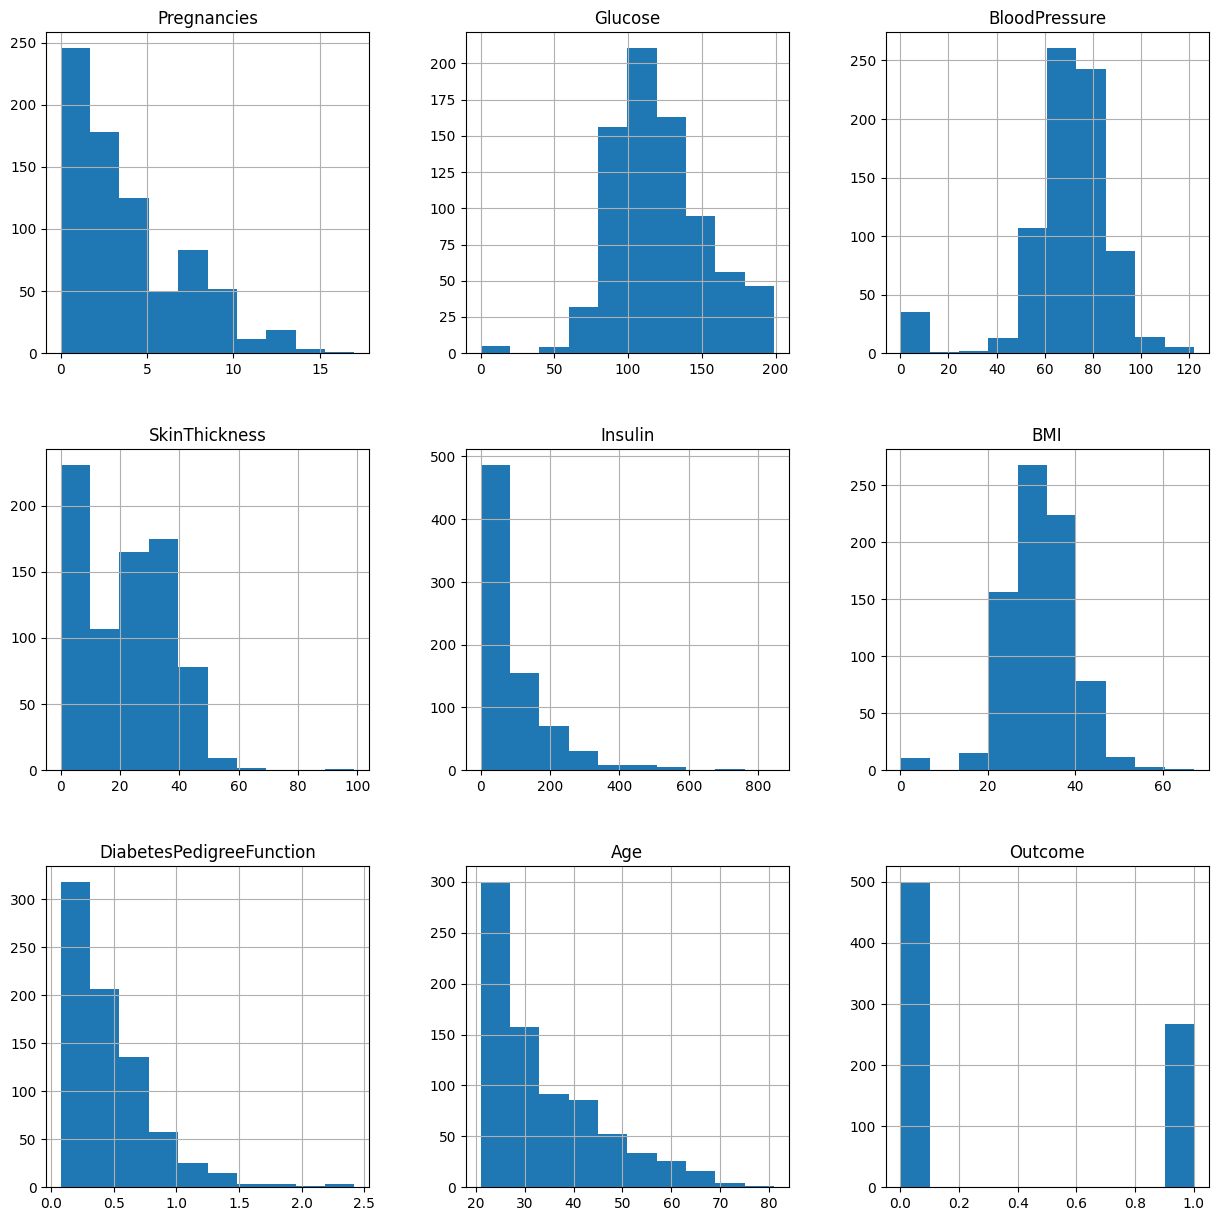

In [12]:
# Plot 
df.hist(figsize = (15,15), bins = 10) 
plt.show()

In [13]:
# Insighs:
# Predomínio de grávidas maioira até 4 filhos
# Concentração de glicose no plasma maioria de 100 a 130 (Os níveis normais de glicose no sangue são de até 99mg/dl pré-prandial (período que antecede a alimentação), e até 140 mg/dl pós-prandial (1 ou 2 horas após a alimentação) .)
# Pressão sanguínea diastólica maioria entre 60 e 85 (Seu valor para uma pessoa saudável adulta é da ordem de 80mmHg)
# Espessura da dobra da pele do tríceps maioria até 40 
# Nível de insulina sérica maioria até 100 (IMC de até 25: 2 a 13 mU/L de insulina.IMC entre 26 e 30: 2 a 19 mU/L de insulina.IMC acima de 30: 2 a 23 mU/L de insulina.)
# Índice de massa corporal (IMC) maioria de 20 a 40 (Menor que 18,5	Baixo peso, De 18,5 a 24,9	Peso normal, De 25 a 29,9	Sobrepeso, De 30 a 34,9	Obesidade grau I, De 35 a 39.9	Obesidade grau II, Igual ou maior que 40	Obesidade grau III)
# Função de pedigree de diabetes maioria até 0,75 (Função que pontua a probabilidade de diabetes com base no histórico familiar)
# Idade maioria até 55 anos
# Saída maioria dos casos sem diabetes

In [14]:
# Correlação (tabela)
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [15]:
#A variável Outcome (que é a que queremos prever) tem melhor correlação com as variáveis: Pregnancies, Glucose e BMI.
# As variáveis preditoras Glucose e Insulin tem alta correlação entre si o que não é bom para o modelo de ML.
# As variáveis preditoras Age e Pregnancies tem alta correlação entre si o que não é bom para o modelo de ML.
# As variáveis preditoras SkinThickness e BMI tem alta correlação entre si o que não é bom para o modelo de ML.

In [16]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
# A variável Outcome (que é a que queremos prever) está desbalanceada. Isso é ruim para o modelo de ML e devemos ajustar antes de criar os modelos.

### Verificando a relação entre atributos

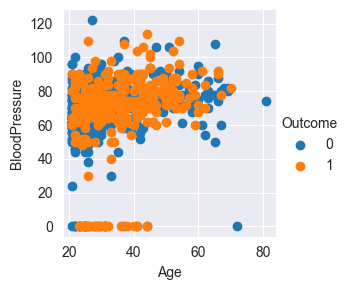

In [18]:
# Define o estilo do background
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(df, hue = 'Outcome').map(plt.scatter, 'Age', 'BloodPressure').add_legend()

Observando os histogramas, podemos ver que os dados estão normalmente distribuídos (seguem uma distribuição normal). 

Observando o gráfico de dispersão, não parece haver correlação entre as duas variáveis. Vamos confirmar calculando o coeficiente de correlação entre elas.

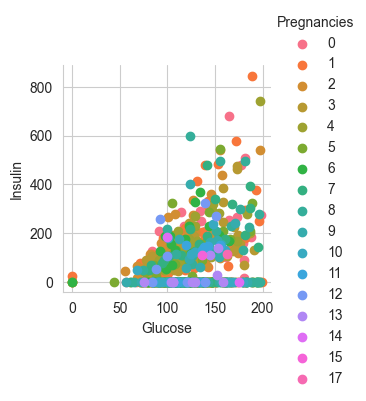

In [19]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(df, hue = 'Pregnancies').map(plt.scatter, 'Glucose', 'Insulin').add_legend()

## 7 - Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

In [20]:
df.shape

(768, 9)

In [21]:
# Verificando valores ausentes
numero_ausentes = df.isnull().sum()
print('A quantidade de valores ausentes em cada coluna é:\n', numero_ausentes)

A quantidade de valores ausentes em cada coluna é:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [22]:
# Verifica registros duplicados (remove uma das duplicatas)
numero_duplicados = df.duplicated().sum()
print('A quantidade de valores duplicados é: ', numero_duplicados)

A quantidade de valores duplicados é:  0


In [23]:
#Tratamento de outliers

<Axes: >

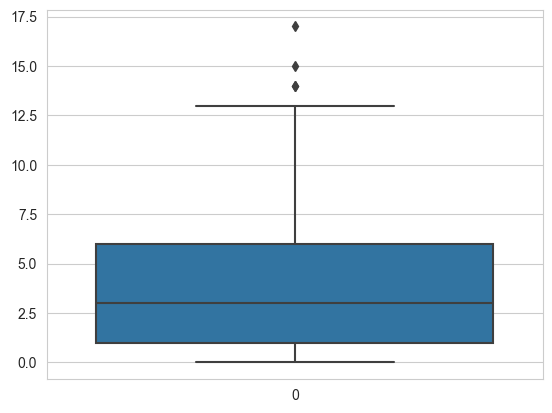

In [24]:
# Boxplot
sns.boxplot(df.Pregnancies)

<Axes: >

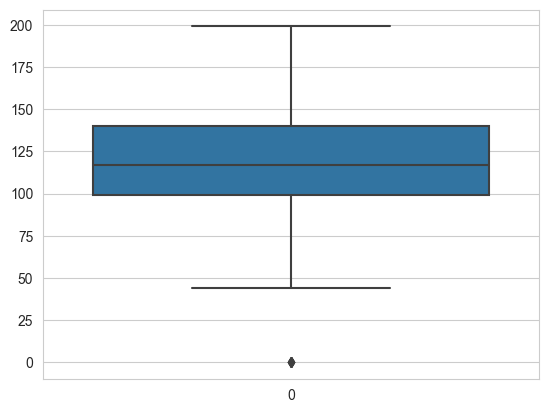

In [25]:
# Boxplot
sns.boxplot(df.Glucose)

<Axes: >

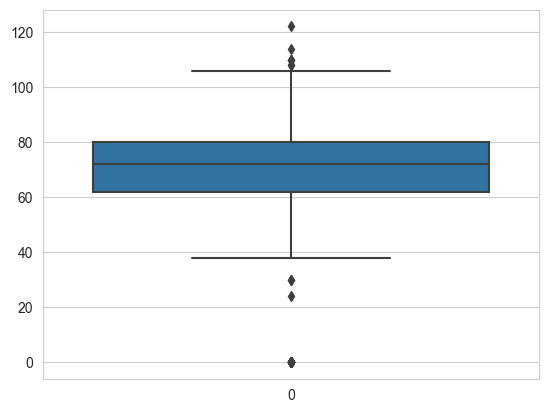

In [26]:
# Boxplot
sns.boxplot(df.BloodPressure )

<Axes: >

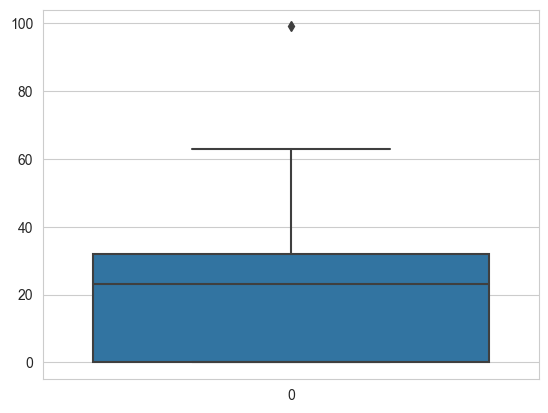

In [27]:
# Boxplot
sns.boxplot(df.SkinThickness)

<Axes: >

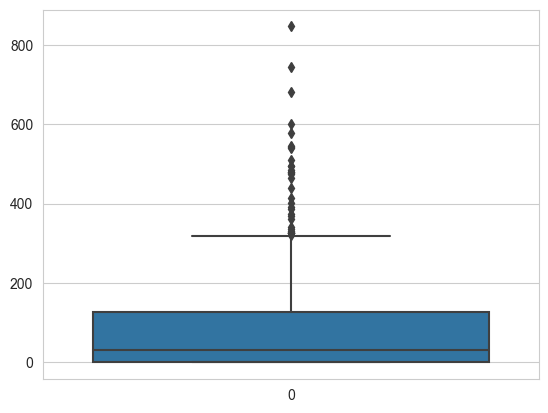

In [28]:
# Boxplot
sns.boxplot(df.Insulin )

<Axes: >

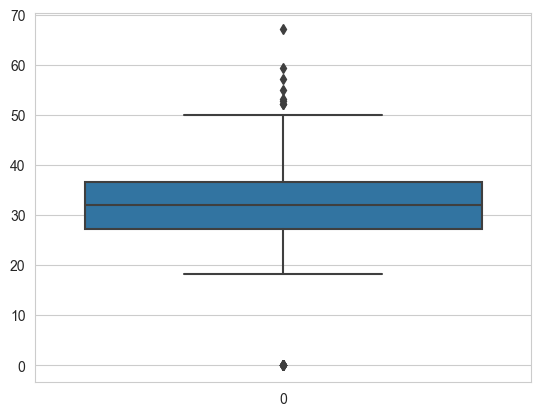

In [29]:
# Boxplot
sns.boxplot(df.BMI  )

<Axes: >

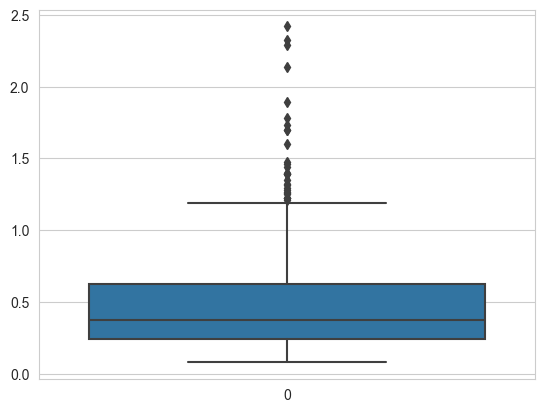

In [30]:
# Boxplot
sns.boxplot(df.DiabetesPedigreeFunction)

<Axes: >

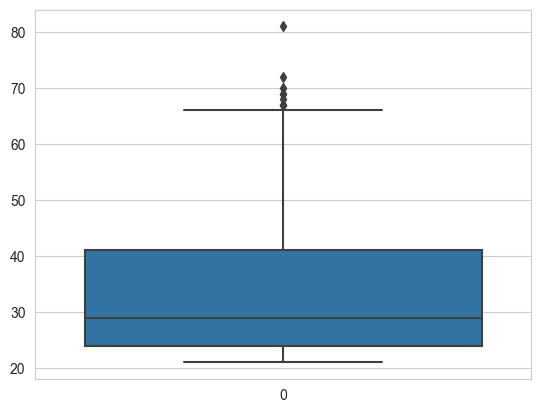

In [31]:
# Boxplot
sns.boxplot(df.Age)

In [32]:
#outliers - variável Pregnancies
# Calcular os quartis
Q1 = df['Pregnancies'].quantile(0.25)
Q3 = df['Pregnancies'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_inferiores = df[df['Pregnancies'] < limite_inferior]
outliers_superiores = df[df['Pregnancies'] > limite_superior]

# Contar a quantidade de outliers inferiores e superiores
quantidade_outliers_inferiores = len(outliers_inferiores)
quantidade_outliers_superiores = len(outliers_superiores)

print("Quantidade de outliers inferiores:", quantidade_outliers_inferiores)
print("Quantidade de outliers superiores:", quantidade_outliers_superiores)


Quantidade de outliers inferiores: 0
Quantidade de outliers superiores: 4


In [33]:
# Decisão: Manter os outliers

In [34]:
#outliers - variável Glucose
# Calcular os quartis
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_inferiores = df[df['Glucose'] < limite_inferior]
outliers_superiores = df[df['Glucose'] > limite_superior]

# Contar a quantidade de outliers inferiores e superiores
quantidade_outliers_inferiores = len(outliers_inferiores)
quantidade_outliers_superiores = len(outliers_superiores)

print("Quantidade de outliers inferiores:", quantidade_outliers_inferiores)
print("Quantidade de outliers superiores:", quantidade_outliers_superiores)


Quantidade de outliers inferiores: 5
Quantidade de outliers superiores: 0


In [35]:
# Decisão: Manter os outliers

In [36]:
#outliers - variável BloodPressure
# Calcular os quartis
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_inferiores = df[df['BloodPressure'] < limite_inferior]
outliers_superiores = df[df['BloodPressure'] > limite_superior]

# Contar a quantidade de outliers inferiores e superiores
quantidade_outliers_inferiores = len(outliers_inferiores)
quantidade_outliers_superiores = len(outliers_superiores)

print("Quantidade de outliers inferiores:", quantidade_outliers_inferiores)
print("Quantidade de outliers superiores:", quantidade_outliers_superiores)


Quantidade de outliers inferiores: 38
Quantidade de outliers superiores: 7


In [37]:
# Decisão: Manter os outliers

In [38]:
#outliers - variável SkinThickness
# Calcular os quartis
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_inferiores = df[df['SkinThickness'] < limite_inferior]
outliers_superiores = df[df['SkinThickness'] > limite_superior]

# Contar a quantidade de outliers inferiores e superiores
quantidade_outliers_inferiores = len(outliers_inferiores)
quantidade_outliers_superiores = len(outliers_superiores)

print("Quantidade de outliers inferiores:", quantidade_outliers_inferiores)
print("Quantidade de outliers superiores:", quantidade_outliers_superiores)


Quantidade de outliers inferiores: 0
Quantidade de outliers superiores: 1


In [39]:
# Decisão: Manter o outlier
       

In [40]:
#outliers - variável Insulin
# Calcular os quartis
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_inferiores = df[df['Insulin'] < limite_inferior]
outliers_superiores = df[df['Insulin'] > limite_superior]

# Contar a quantidade de outliers inferiores e superiores
quantidade_outliers_inferiores = len(outliers_inferiores)
quantidade_outliers_superiores = len(outliers_superiores)

print("Quantidade de outliers inferiores:", quantidade_outliers_inferiores)
print("Quantidade de outliers superiores:", quantidade_outliers_superiores)


Quantidade de outliers inferiores: 0
Quantidade de outliers superiores: 34


In [41]:
 # Decisão: Manter os outliers

In [42]:
#outliers - variável BMI
# Calcular os quartis
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_inferiores = df[df['BMI'] < limite_inferior]
outliers_superiores = df[df['BMI'] > limite_superior]

# Contar a quantidade de outliers inferiores e superiores
quantidade_outliers_inferiores = len(outliers_inferiores)
quantidade_outliers_superiores = len(outliers_superiores)

print("Quantidade de outliers inferiores:", quantidade_outliers_inferiores)
print("Quantidade de outliers superiores:", quantidade_outliers_superiores)


Quantidade de outliers inferiores: 11
Quantidade de outliers superiores: 8


In [43]:
# Decisão: Manter os outliers

In [44]:
#outliers - variável DiabetesPedigreeFunction
# Calcular os quartis
Q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df['DiabetesPedigreeFunction'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_inferiores = df[df['DiabetesPedigreeFunction'] < limite_inferior]
outliers_superiores = df[df['DiabetesPedigreeFunction'] > limite_superior]

# Contar a quantidade de outliers inferiores e superiores
quantidade_outliers_inferiores = len(outliers_inferiores)
quantidade_outliers_superiores = len(outliers_superiores)

print("Quantidade de outliers inferiores:", quantidade_outliers_inferiores)
print("Quantidade de outliers superiores:", quantidade_outliers_superiores)


Quantidade de outliers inferiores: 0
Quantidade de outliers superiores: 29


In [45]:
# Decisão: Manter os outliers

In [46]:
#outliers - variável Age
# Calcular os quartis
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_inferiores = df[df['Age'] < limite_inferior]
outliers_superiores = df[df['Age'] > limite_superior]

# Contar a quantidade de outliers inferiores e superiores
quantidade_outliers_inferiores = len(outliers_inferiores)
quantidade_outliers_superiores = len(outliers_superiores)

print("Quantidade de outliers inferiores:", quantidade_outliers_inferiores)
print("Quantidade de outliers superiores:", quantidade_outliers_superiores)


Quantidade de outliers inferiores: 0
Quantidade de outliers superiores: 9


In [47]:
# Decisão: Manter os outliers

### Balanceando os dados de saída

In [48]:
# Vamos fazer o Under sampling para este balanceamento

# Separar features e target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Criar o objeto RandomUnderSampler para balancear as classes
rus = RandomUnderSampler(random_state=42)

# Aplicar o undersampling aos dados
X_resampled, y_resampled = rus.fit_resample(X, y)

# Converter os dados balanceados de volta para DataFrame
df_balanceado = pd.DataFrame(X_resampled, columns=X.columns)
df_balanceado['Outcome'] = y_resampled

# Visualizar o DataFrame balanceado
#print(df_balanceado)

# novo shape após balanceamento
df_balanceado.shape


(536, 9)

In [49]:
# Quantidade de respostas com e sem diabetes balanceada
df_balanceado['Outcome'].value_counts()

0    268
1    268
Name: Outcome, dtype: int64

# 8 - Construção, Treinamento e Avaliação do Modelo 1 com Regressão Logística (Benchmark)


In [50]:
# Preparando os dados de treino e teste
# X = df.drop(columns='Outcome')
# y = df['Outcome']

X = df_balanceado.drop(columns='Outcome')
y = df_balanceado['Outcome']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=10)

### Padronização

In [51]:
scaler = StandardScaler()

In [52]:
scaler.fit(X_treino)

StandardScaler()

In [53]:
X_treino = scaler.transform(X_treino)

In [54]:
X_teste = scaler.transform(X_teste)

In [55]:
X_treino[:5]

array([[ 0.85591446, -0.55980992,  0.25421671, -1.24039822, -0.68454544,
        -0.36678014, -0.67948254, -0.2685443 ],
       [-1.15216677,  1.662925  , -0.13524101,  1.10840803, -0.68454544,
         1.20939441,  3.73085429, -0.78318741],
       [-0.57842927, -1.13832996, -0.52469873,  0.32547261, -0.551268  ,
        -0.51931316,  0.69824318, -1.04050896],
       [-0.86529802,  1.17575022,  0.64367443,  1.34931124, -0.12644619,
         0.03997458, -0.4453768 ,  1.36115887],
       [-0.86529802, -0.19442883, -1.20624974,  1.59021444, -0.15976554,
         0.38317388, -0.6095199 , -0.78318741]])

In [56]:
X_teste[:5]

array([[ 0.56904572, -0.43801622, -0.23260544,  1.10840803, -0.68454544,
         0.21792977, -0.66333731, -0.86896126],
       [-1.15216677, -1.26012366, -0.23260544,  0.08456941, -0.13477603,
         0.42130713,  0.10356079, -1.12628281],
       [-0.86529802,  0.07960698,  0.93576772,  1.10840803,  0.23173691,
         0.51028473,  1.48128651,  0.24609881],
       [-0.29156053, -1.3210205 ,  0.05948785, -1.24039822, -0.68454544,
        -1.44722237, -0.31621501, -0.78318741],
       [ 1.14278321,  1.69337342, -0.03787658,  0.92773063,  3.43872514,
        -0.30322472,  0.29192173,  2.21889738]])

## 8.1 - Modelo de Regressão Logística

In [57]:
# Cria o modelo
modelo_v1 = LogisticRegression()

In [58]:
# Treinamento
modelo_v1.fit(X_treino, y_treino)

LogisticRegression()

In [59]:
# Avaliação do Modelo

Previsao = modelo_v1.predict(X_teste)
print('Matriz Confusão: \n', confusion_matrix(y_teste, Previsao), '\n')

Matriz Confusão: 
 [[40 10]
 [17 41]] 



In [60]:
# Métricas de Classificação - Relatório de Classificação
print('Relatório de Classificação - Regressão Logistica: \n', classification_report(y_teste, Previsao))

Relatório de Classificação - Regressão Logistica: 
               precision    recall  f1-score   support

           0       0.70      0.80      0.75        50
           1       0.80      0.71      0.75        58

    accuracy                           0.75       108
   macro avg       0.75      0.75      0.75       108
weighted avg       0.76      0.75      0.75       108



In [61]:
# Previsão Balanceada
print('Score (Treino): ', round(modelo_v1.score(X_treino, y_treino), 2))
print('Score (Teste): ', round(modelo_v1.score(X_teste, y_teste), 2))

Score (Treino):  0.76
Score (Teste):  0.75


In [62]:
# Fazer previsões no conjunto de teste
y_pred = modelo_v1.predict(X_teste)

In [63]:
# Avaliar a precisão do modelo
accuracy_v1 = accuracy_score(y_teste, y_pred)
print("Accuracy:", accuracy_v1)

Accuracy: 0.75


## 8.2 - Modelo de Random Forest

In [64]:
# Cria o modelo
modelo_v2 = RandomForestClassifier(max_depth=3)

In [65]:
# Treinamento
modelo_v2.fit(X_treino, y_treino)

RandomForestClassifier(max_depth=3)

In [66]:
# Avaliação do modelo
Previsao_forest = modelo_v2.predict(X_teste)
print('Relatório de Classificação - Random Forest: \n', classification_report(y_teste, Previsao_forest))

Relatório de Classificação - Random Forest: 
               precision    recall  f1-score   support

           0       0.67      0.74      0.70        50
           1       0.75      0.69      0.72        58

    accuracy                           0.71       108
   macro avg       0.71      0.71      0.71       108
weighted avg       0.72      0.71      0.71       108



In [67]:
# Fazer previsões no conjunto de teste
y_pred = modelo_v2.predict(X_teste)

In [68]:
# Avaliar a precisão do modelo
accuracy_v2 = accuracy_score(y_teste, y_pred)
print("Accuracy:", accuracy_v2)

Accuracy: 0.7129629629629629


## 8.3 - Modelo de SVM

In [69]:
# Cria o modelo
modelo_v3 = SVC(kernel='linear')

In [70]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

SVC(kernel='linear')

In [71]:
# Avaliação do modelo
Previsao_svm = modelo_v3.predict(X_teste)
print('Relatório de Classificação - SVM: \n', classification_report(y_teste, Previsao_svm))

Relatório de Classificação - SVM: 
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        50
           1       0.82      0.69      0.75        58

    accuracy                           0.75       108
   macro avg       0.76      0.75      0.75       108
weighted avg       0.76      0.75      0.75       108



In [72]:
# Fazer previsões no conjunto de teste
y_pred = modelo_v3.predict(X_teste)

In [73]:
# Avaliar a precisão do modelo
accuracy_v3 = accuracy_score(y_teste, y_pred)
print("Accuracy:", accuracy_v3)

Accuracy: 0.75


## 8.4 - Modelo de Rede Neural

In [74]:
# Criar o modelo
modelo_v4 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)

In [75]:
# Treinamento
modelo_v4.fit(X_treino, y_treino)

C:\Users\Chilov\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [76]:
# Avaliação do modelo
Previsao_rn = modelo_v4.predict(X_teste)
print('Relatório de Classificação - Rede Neural: \n', classification_report(y_teste, Previsao_rn))

Relatório de Classificação - Rede Neural: 
               precision    recall  f1-score   support

           0       0.72      0.78      0.75        50
           1       0.80      0.74      0.77        58

    accuracy                           0.76       108
   macro avg       0.76      0.76      0.76       108
weighted avg       0.76      0.76      0.76       108



In [77]:
# Treinamento
modelo_v4.fit(X_treino, y_treino)

C:\Users\Chilov\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [78]:
# Fazer previsões no conjunto de teste
y_pred = modelo_v4.predict(X_teste)

In [79]:
# Avaliar a precisão do modelo
accuracy_v4 = accuracy_score(y_teste, y_pred)
print("Accuracy:", accuracy_v4)

Accuracy: 0.7592592592592593


## 8.5 - Modelo de XGBOOST

In [80]:
# Criar o modelo
modelo_v5 = XGBClassifier(learning_rate=0.01, n_estimators=1000, max_depth=3, random_state=42)

In [81]:
# Treinamento
modelo_v5.fit(X_treino, y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [82]:
# Fazer previsões no conjunto de teste
y_pred = modelo_v5.predict(X_teste)

In [83]:
# Avaliação do modelo
Previsao_xgboost = modelo_v5.predict(X_teste)
print('Relatório de Classificação - XGBOOST: \n', classification_report(y_teste, Previsao_xgboost))

Relatório de Classificação - XGBOOST: 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72        50
           1       0.76      0.72      0.74        58

    accuracy                           0.73       108
   macro avg       0.73      0.73      0.73       108
weighted avg       0.73      0.73      0.73       108



In [84]:
# Avaliar a precisão do modelo
accuracy_v5 = accuracy_score(y_teste, y_pred)
print("Accuracy:", accuracy_v5)

Accuracy: 0.7314814814814815


## 8.6 - Modelo de LIGHTGBM

In [85]:
# Criar o modelo
modelo_v6 = LGBMClassifier(learning_rate=0.01, n_estimators=1000, max_depth=3, random_state=42)

In [86]:
# Treinamento
modelo_v6.fit(X_treino, y_treino)

C:\Users\Chilov\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Chilov\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[LightGBM] [Info] Number of positive: 210, number of negative: 218
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 428, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490654 -> initscore=-0.037388
[LightGBM] [Info] Start training from score -0.037388
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000,
               random_state=42)

In [87]:
# Fazer previsões no conjunto de teste
y_pred = modelo_v6.predict(X_teste)

In [88]:
# Avaliação do modelo
Previsao_lightGBM = modelo_v6.predict(X_teste)
print('Relatório de Classificação - XGBOOST: \n', classification_report(y_teste, Previsao_lightGBM))

Relatório de Classificação - XGBOOST: 
               precision    recall  f1-score   support

           0       0.67      0.78      0.72        50
           1       0.78      0.67      0.72        58

    accuracy                           0.72       108
   macro avg       0.73      0.73      0.72       108
weighted avg       0.73      0.72      0.72       108



In [89]:
# Avaliar a precisão do modelo
accuracy_v6 = accuracy_score(y_teste, y_pred)
print("Accuracy:", accuracy_v6)

Accuracy: 0.7222222222222222


In [90]:
print('A acurácia do modelo_v1 (Regressão Logística) é:\n', accuracy_v1)
print('A acurácia do modelo_v2 (Random Forest) é:\n', accuracy_v2)
print('A acurácia do modelo_v3 (SVM) é:\n', accuracy_v3)
print('A acurácia do modelo_v4 (Rede Neural) é:\n', accuracy_v4)
print('A acurácia do modelo_v5 (XGBOOST) é:\n', accuracy_v5)
print('A acurácia do modelo_v5 (LIGHTBGM) é:\n', accuracy_v6)

A acurácia do modelo_v1 (Regressão Logística) é:
 0.75
A acurácia do modelo_v2 (Random Forest) é:
 0.7129629629629629
A acurácia do modelo_v3 (SVM) é:
 0.75
A acurácia do modelo_v4 (Rede Neural) é:
 0.7592592592592593
A acurácia do modelo_v5 (XGBOOST) é:
 0.7314814814814815
A acurácia do modelo_v5 (LIGHTBGM) é:
 0.7222222222222222


## Seleção do Modelo

#### Os melhores modelos são v1 e v3. Neste caso, devemos procurar o modelo mais simples. Então seguiremos com o modelo_v1 Regressão Logística

## 8.6 - Otimização do modelo

### 8.6.1 - Otimização somente com mudança de hiperparâmetro

In [91]:
#obtem variáveis preditoras 
X = df_balanceado.drop(columns='Outcome')
y = df_balanceado['Outcome']

# Dividir os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o classificador (Random Forest)
clf = RandomForestClassifier()

# Inicializar o seletor de características (RFE) com o classificador e o número de características desejadas
rfe = RFE(estimator=clf, n_features_to_select=3, step=1)

# Ajustar o seletor de características aos dados de treinamento
rfe.fit(X_treino, y_treino)

# Obter as características selecionadas
selected_features = rfe.support_

# Imprimir as características selecionadas
print("Características selecionadas:")
for i in range(len(selected_features)):
    if selected_features[i]:
        print(f"Feature {i}: {X.columns[i]}")

Características selecionadas:
Feature 1: Glucose
Feature 5: BMI
Feature 7: Age


In [92]:
#vamos novamente treinar só com estas variáveis
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [93]:
#X = df_balanceado.drop(columns=['Pregnancies','BloodPressure', 'SkinThickness', 'Insulin', 'Outcome'])
X = df_balanceado[['Glucose', 'BMI', 'DiabetesPedigreeFunction']]
y = df_balanceado['Outcome']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=10)

In [94]:
# Padronização
scaler = StandardScaler()
scaler.fit(X_treino)
X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

In [95]:
# Cria o modelo
modelo_v7 = LogisticRegression()
# Treinamento
modelo_v7.fit(X_treino, y_treino)

LogisticRegression()

In [96]:
# Avaliação do Modelo
Previsao = modelo_v7.predict(X_teste)
print('Matriz Confusão: \n', confusion_matrix(y_teste, Previsao), '\n')

Matriz Confusão: 
 [[41  9]
 [19 39]] 



In [97]:
# Métricas de Classificação - Relatório de Classificação
print('Relatório de Classificação - Regressão Logistica: \n', classification_report(y_teste, Previsao))

Relatório de Classificação - Regressão Logistica: 
               precision    recall  f1-score   support

           0       0.68      0.82      0.75        50
           1       0.81      0.67      0.74        58

    accuracy                           0.74       108
   macro avg       0.75      0.75      0.74       108
weighted avg       0.75      0.74      0.74       108



In [98]:
# Fazer previsões no conjunto de teste
y_pred = modelo_v7.predict(X_teste)
# Avaliar a precisão do modelo
accuracy_v7 = accuracy_score(y_teste, y_pred)
print("Accuracy:", accuracy_v7)

Accuracy: 0.7407407407407407


In [99]:
# tive uma acurácia um pouco menor com um modelo com menos variáveis preditoras, ou seja, mais simples

In [100]:
# Define lista de hiperparâmetros
tuned_params_v8 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

In [101]:
# Criaremos o modelo com GridSearch 
# Vários modelos serão criados com diferentes combinações de hiperparâmetros
modelo_v8 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v8, 
                         scoring = 'accuracy', 
                         n_jobs = -1)

In [102]:
# Treinamento do modelo
modelo_v8.fit(X_treino, y_treino)

C:\Users\Chilov\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Chilov\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Chilov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Chilov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
V

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [103]:
# Selecionamos o melhor modelo
modelo_v8.best_estimator_

LogisticRegression(C=0.01)

In [104]:
# Previsões com dados de teste
y_pred_v8 = modelo_v8.predict(X_teste)

In [105]:
# Mostra as 10 primeiras previsões
y_pred_v8[:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [106]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v8 = modelo_v8.predict_proba(X_teste)

In [107]:
# Mostra as 10 primeiras previsões
y_pred_proba_v8[:10]

array([[0.56429416, 0.43570584],
       [0.62198388, 0.37801612],
       [0.41778668, 0.58221332],
       [0.75769115, 0.24230885],
       [0.3285916 , 0.6714084 ],
       [0.64310392, 0.35689608],
       [0.57421192, 0.42578808],
       [0.62734546, 0.37265454],
       [0.74740611, 0.25259389],
       [0.68575121, 0.31424879]])

In [108]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcula a Curva ROC
y_pred_proba_v8 = modelo_v8.predict_proba(X_teste)[:,1]

In [109]:
# Mostra as 10 primeiras previsões
y_pred_proba_v8[:10]

array([0.43570584, 0.37801612, 0.58221332, 0.24230885, 0.6714084 ,
       0.35689608, 0.42578808, 0.37265454, 0.25259389, 0.31424879])

In [110]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v8)

array([[41,  9],
       [19, 39]], dtype=int64)

In [111]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v8).ravel()

In [112]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v8 = roc_auc_score(y_teste, y_pred_v8)
print(roc_auc_v8)

0.7462068965517242


In [113]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v8, tpr_v8, thresholds = roc_curve(y_teste, y_pred_proba_v8)

In [114]:
# AUC em teste
auc_v8 = auc(fpr_v8, tpr_v8)
print(auc_v8)

0.8437931034482758


In [115]:
# Acurácia em teste
acuracia_v8 = accuracy_score(y_teste, y_pred_v8)
print(acuracia_v8)

0.7407407407407407


### 8.6.2 - Otimização excluindo outliers e buscando melhor hiperparâmetro

In [116]:
# Remover outliers - variável Glucose
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
df = df[(df['Glucose'] >= limite_inferior) & (df['Glucose'] <= limite_superior)]

In [117]:
# Remover outliers - variável BMI
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
df = df[(df['BMI'] >= limite_inferior) & (df['BMI'] <= limite_superior)]

In [118]:
# Remover outliers - variável DiabetesPedigreeFunction
Q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
df_sem_outliers = df[(df['DiabetesPedigreeFunction'] >= limite_inferior) & (df['DiabetesPedigreeFunction'] <= limite_superior)]

In [119]:
df_sem_outliers.shape

(717, 9)

In [120]:
df_sem_outliers['Outcome'].value_counts()

0    475
1    242
Name: Outcome, dtype: int64

In [121]:
# Vamos fazer o Under sampling para este balanceamento

# Separar features e target
X = df_sem_outliers.drop('Outcome', axis=1)
y = df_sem_outliers['Outcome']

# Criar o objeto RandomUnderSampler para balancear as classes
rus = RandomUnderSampler(random_state=42)

# Aplicar o undersampling aos dados
X_resampled, y_resampled = rus.fit_resample(X, y)

# Converter os dados balanceados de volta para DataFrame
df_balanceado = pd.DataFrame(X_resampled, columns=X.columns)
df_balanceado['Outcome'] = y_resampled

# Visualizar o DataFrame balanceado
#print(df_balanceado)

# novo shape após balanceamento
df_balanceado.shape

(484, 9)

In [122]:
#X = df_balanceado.drop(columns=['Pregnancies','BloodPressure', 'SkinThickness', 'Insulin', 'Outcome'])
X = df_balanceado[['Glucose', 'BMI', 'DiabetesPedigreeFunction']]
y = df_balanceado['Outcome']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=10)

In [123]:
# Padronização
scaler = StandardScaler()
scaler.fit(X_treino)
X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

In [124]:
# Define lista de hiperparâmetros
tuned_params_v9 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

In [125]:
# Criaremos o modelo com GridSearch 
# Vários modelos serão criados com diferentes combinações de hiperparâmetros
modelo_v9 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v9, 
                         scoring = 'accuracy', 
                         n_jobs = -1)

In [126]:
# Treinamento do modelo
modelo_v9.fit(X_treino, y_treino)

C:\Users\Chilov\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Chilov\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Chilov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Chilov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
V

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [127]:
# Selecionamos o melhor modelo
modelo_v9.best_estimator_
# Previsões com dados de teste
y_pred_v9 = modelo_v9.predict(X_teste)
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcula a Curva ROC
y_pred_proba_v9 = modelo_v9.predict_proba(X_teste)[:,1]
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v9)
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v9).ravel()

In [128]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v9 = roc_auc_score(y_teste, y_pred_v9)
print(roc_auc_v9)

0.6804255319148935


In [129]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v9, tpr_v9, thresholds = roc_curve(y_teste, y_pred_proba_v9)

In [130]:
# AUC em teste
auc_v9 = auc(fpr_v9, tpr_v9)
print(auc_v9)

0.8038297872340425


In [131]:
# Acurácia em teste
acuracia_v9 = accuracy_score(y_teste, y_pred_v9)
print(acuracia_v9)

0.6804123711340206


## Conclusão

## O modelo_V8 foi o melhor utilizando somente as variáveis 'Glucose', 'BMI', 'DiabetesPedigreeFunction' como preditoras com uma acurácia de 74% que é aceitável diante da pouca quantidade de dados.

# Fim